Testing component parts of som-ffn_core

In [ ]:
####  IMPORT FUNCTIONS
from selforganizingmap import SelfOrganizingMap
from feedforwardnetwork import FeedForwardNetwork


In [2]:
####  DEFINE CLASSES
som = SelfOrganizingMap()
ffn = FeedForwardNetwork()


In [3]:
####  STEP 1: Self-Organizing Map

##  Define input data for Self-Organising Map
som_input = {
    'mld': '../input-data/mld_clim_v2018.mat',
    'sss': '../input-data/sss_v2018.mat',
    'sst': '../input-data/sst_v2018.mat',
    # 'pressure': './input-data/pres_v2024.nc',
    # 'data_all': '../input-data/atm_co2_grid_v2024.nc',
    'data_all': '../input-data/atm_pco2_grid_v2018.mat'
    # 'chl': './input-data/chl_v2024.mat'
    # 'data_taka': './input-data/Taka_pCO2_eth_v2024.mat'
}

In [4]:
som_input

{'mld': '../input-data/mld_clim_v2018.mat',
 'sss': '../input-data/sss_v2018.mat',
 'sst': '../input-data/sst_v2018.mat',
 'data_all': '../input-data/atm_pco2_grid_v2018.mat'}

Self Organizing Map training ended after 0.27190518379211426 seconds


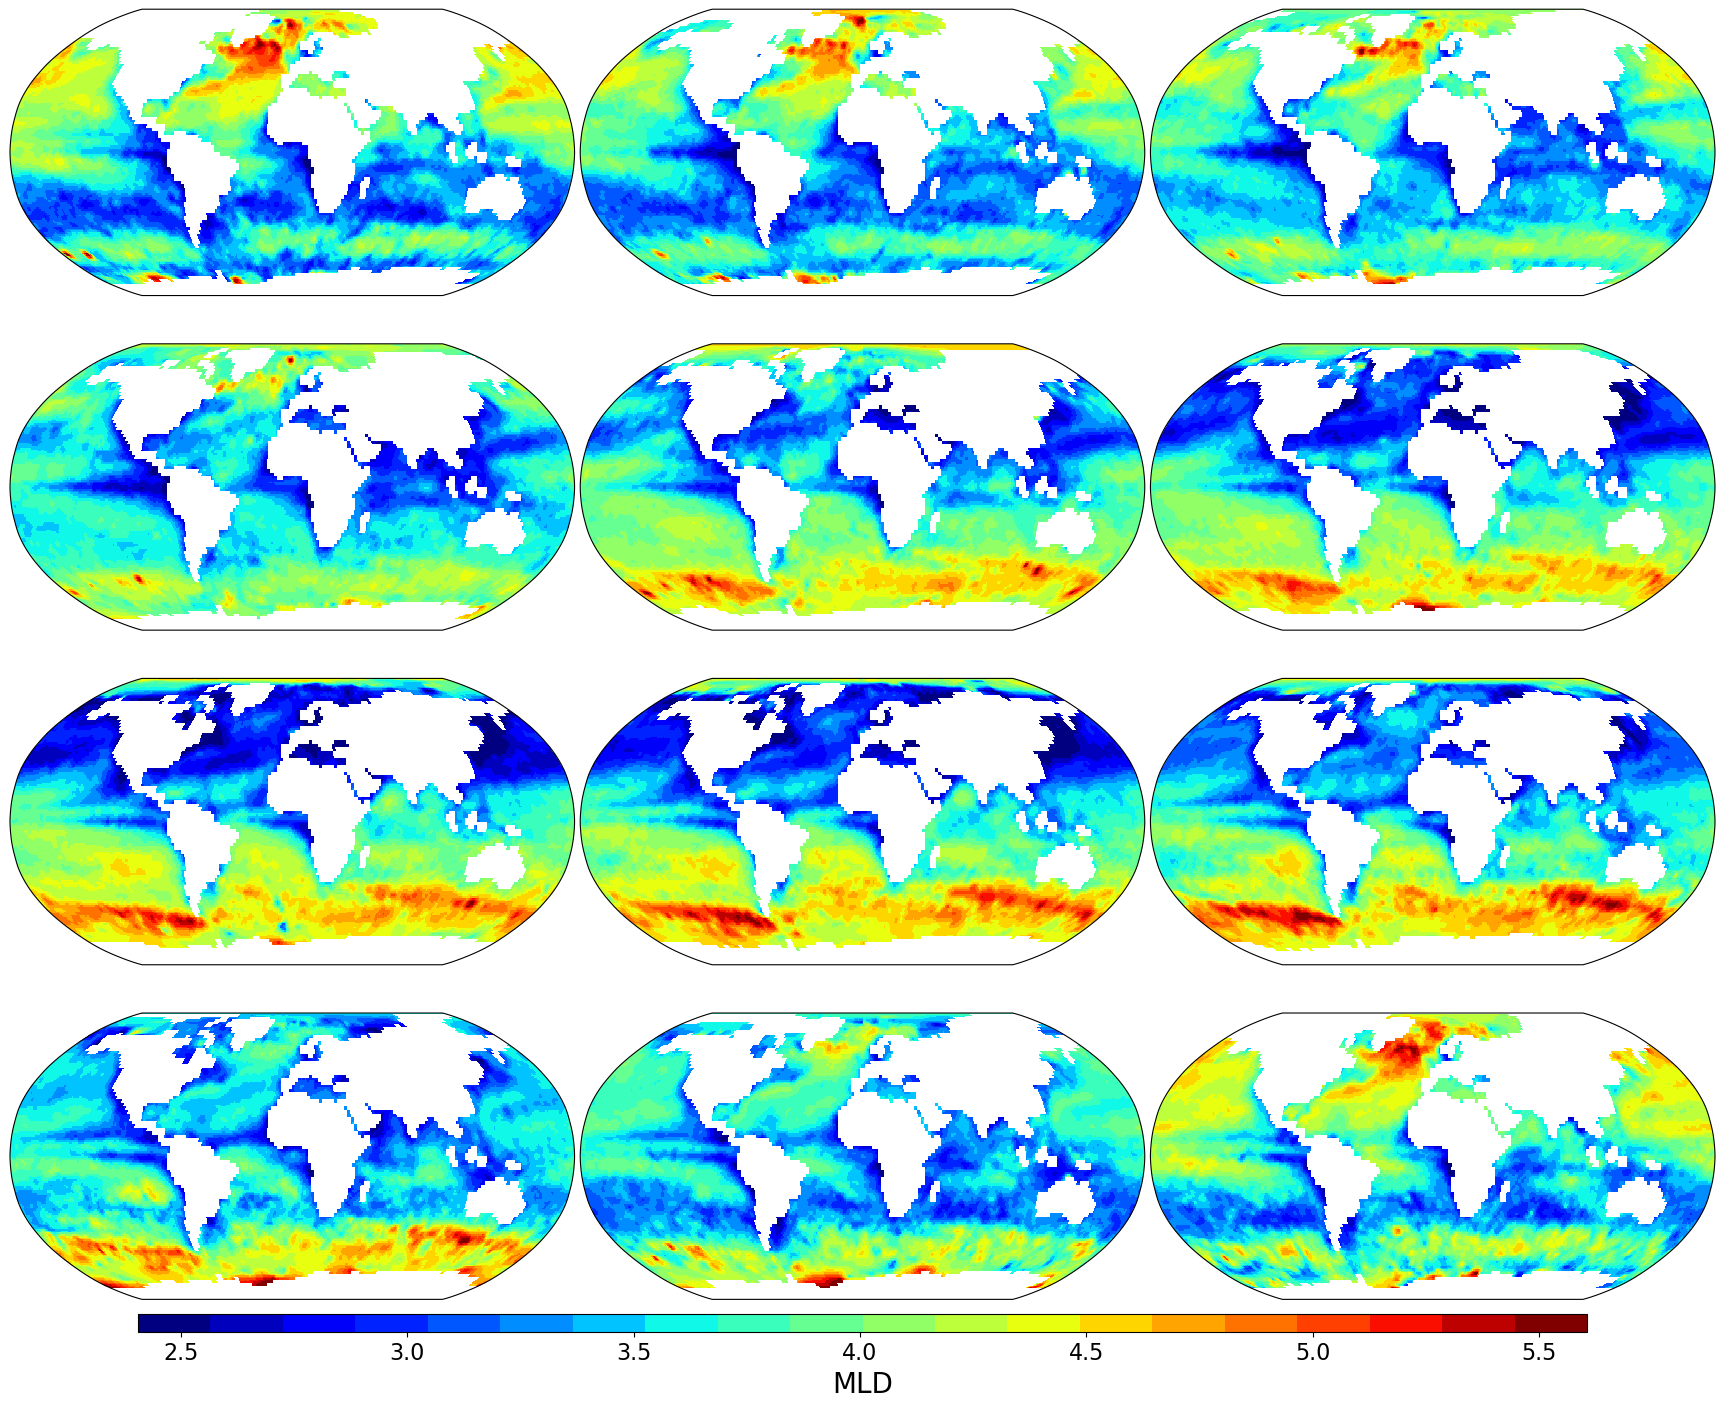

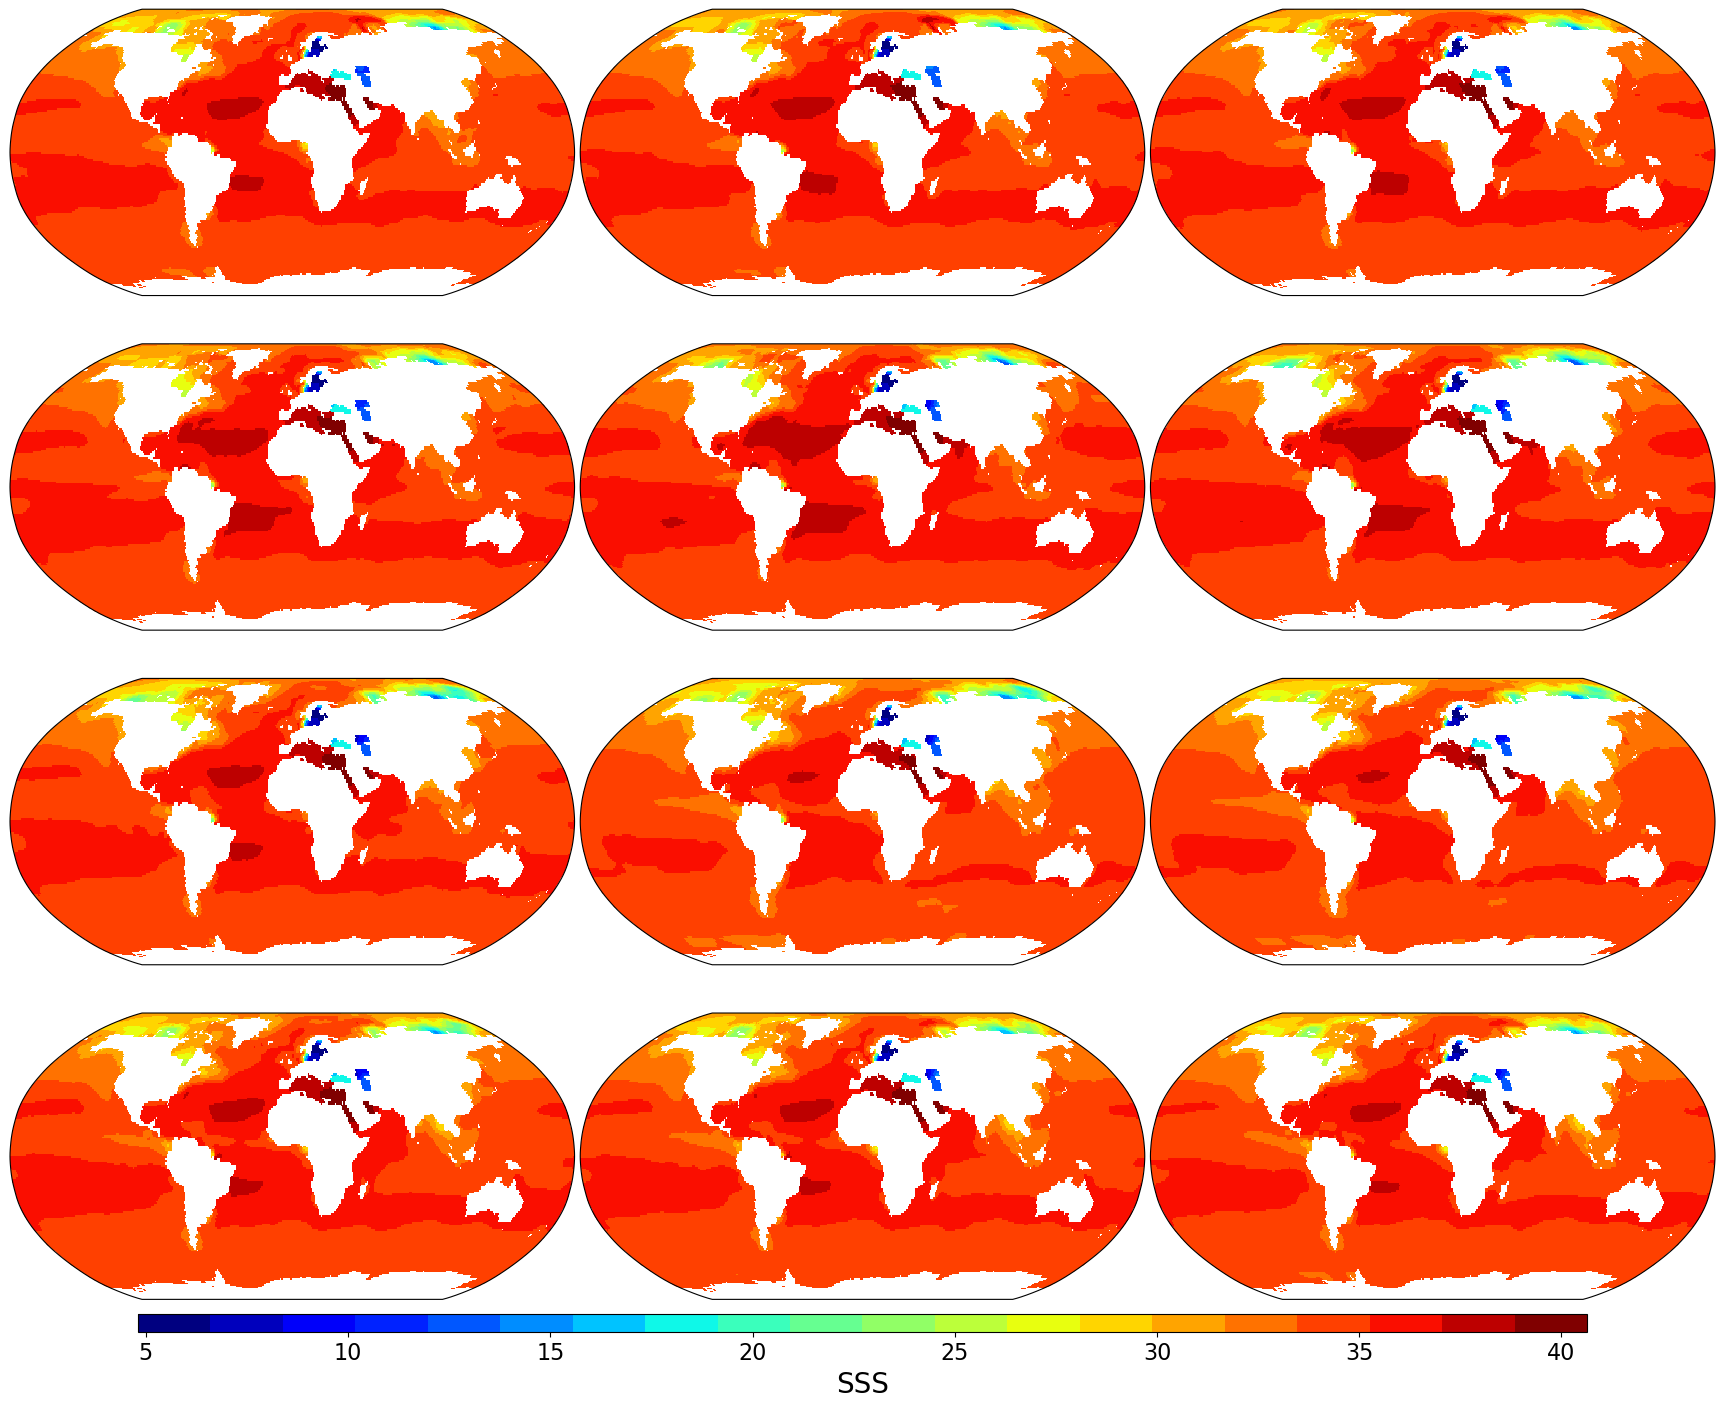

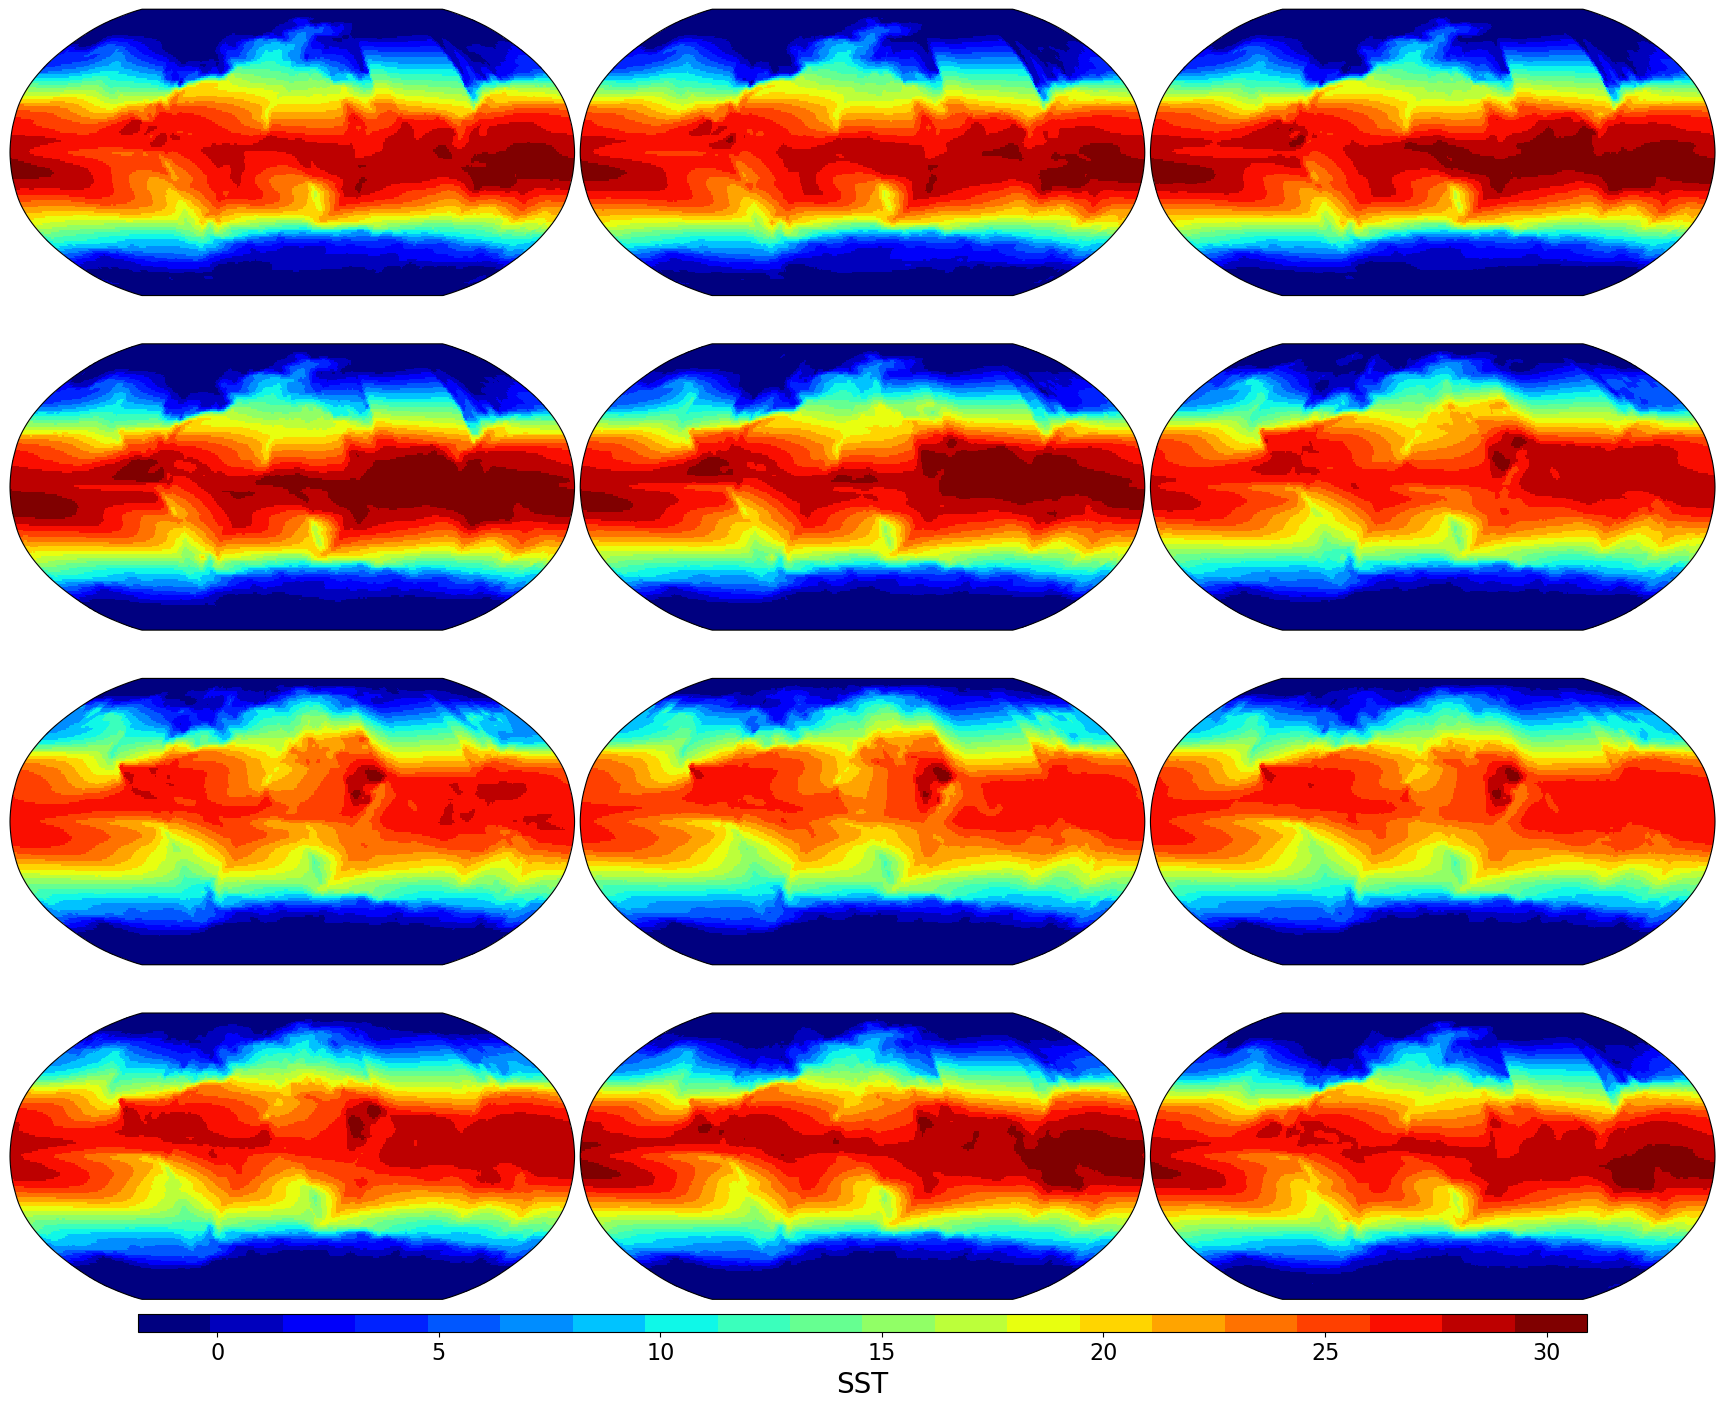

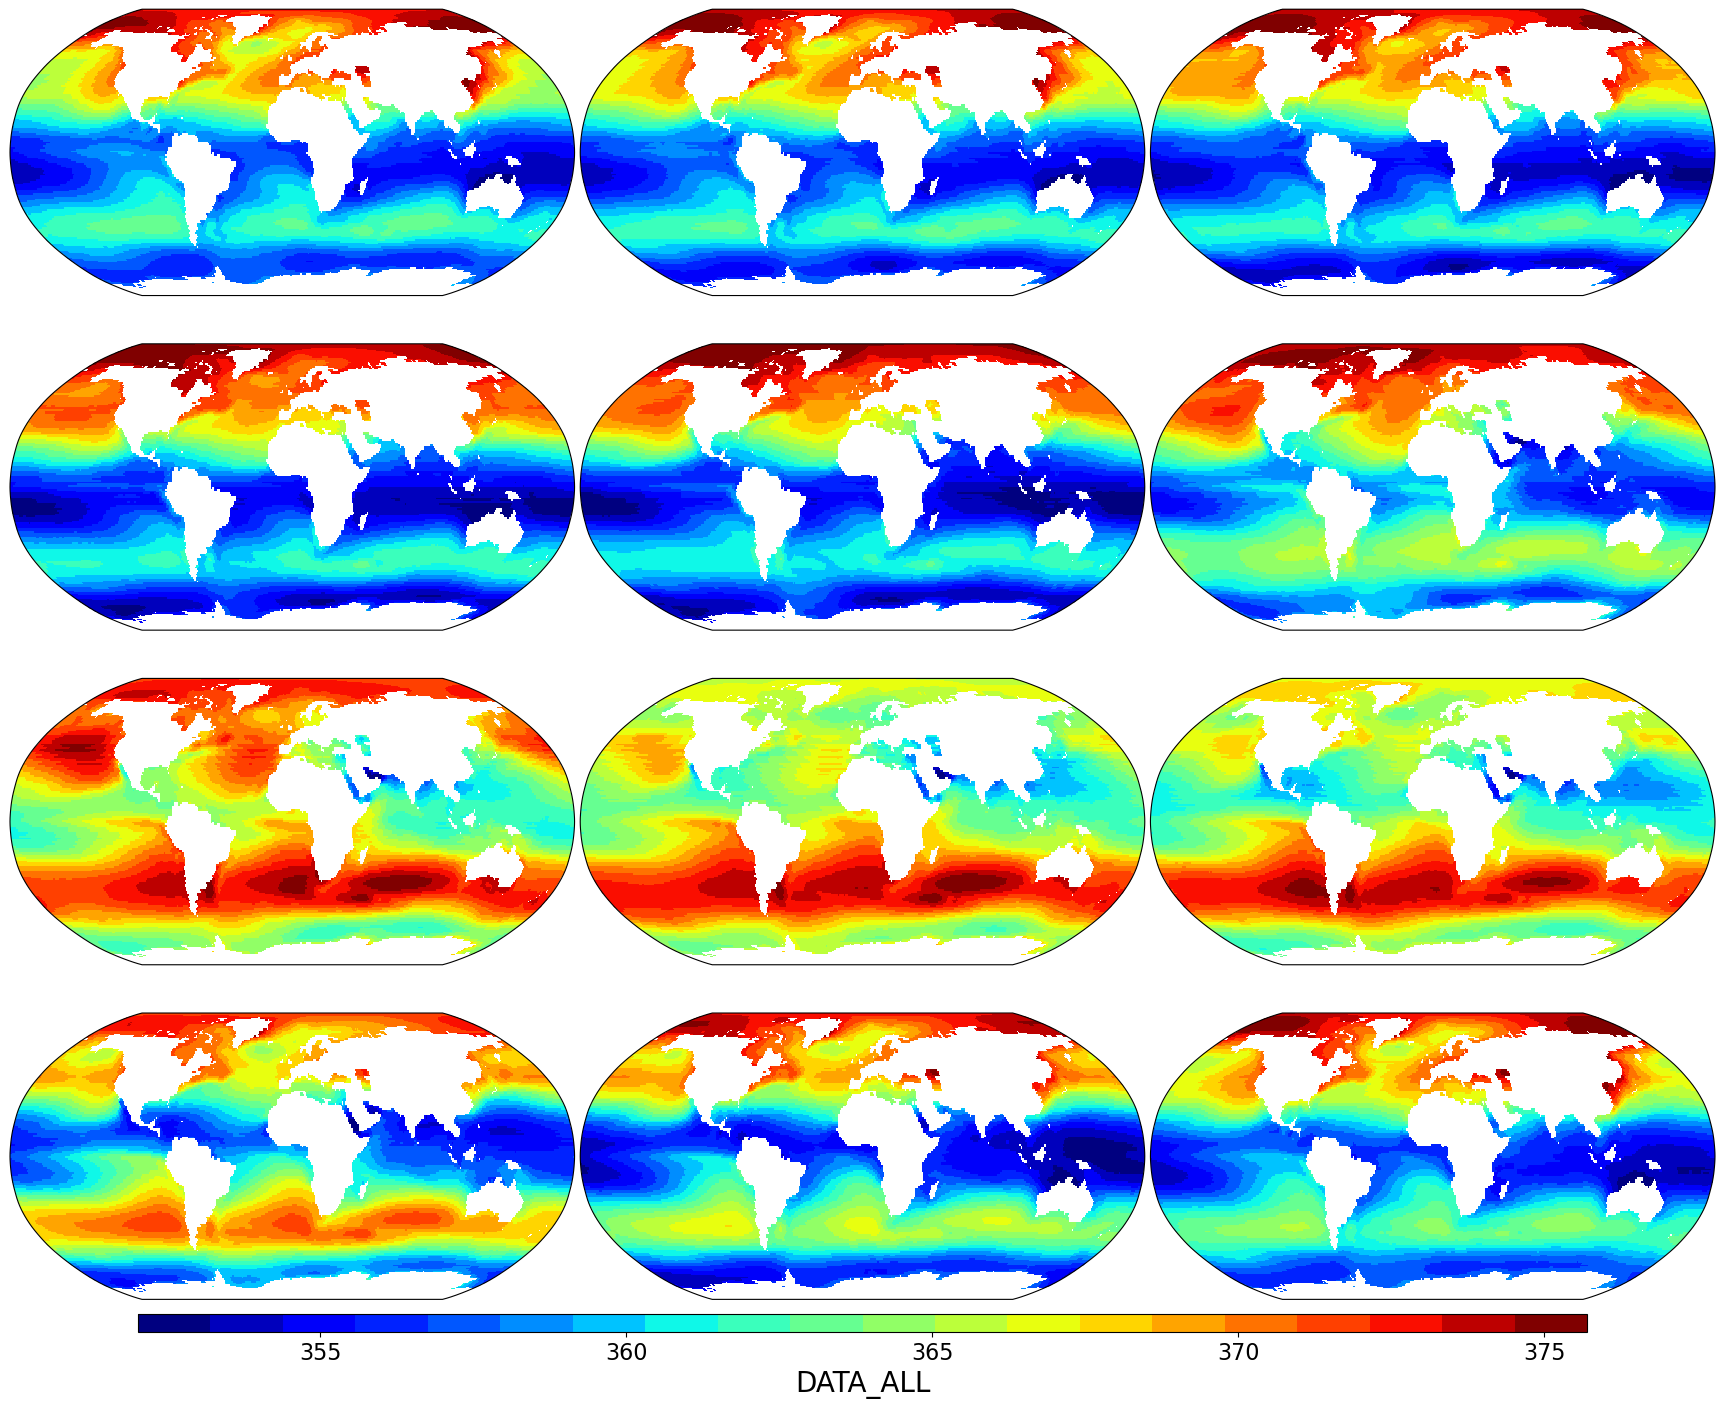

In [5]:
 ##  Call Functions for Feed Forward Network Operation
som.LoadInputData(som_input)
som.CalculateMeanMonths()
som.PlotInputsMonthly()  # optional
som.ReshapeRearrange()
som.IdentifyProvinces(som_sigma = 1.75, som_learning_rate = 1.0, number_of_epochs = 20000)  # values upwards of 200000 work best
# # som.LoadComparisonProvinces()  # optional TODO
# som.PlotProvinces(plot_type = 'mode-variability')  # optional TODO expand with additional visualisation options
som.WriteProvinces(fileext = 'nc')  # optional


In [4]:
##  Define input data for Feed Forward Network
ffn_input = {
    'mld': '../input-data/mld_clim_v2018.mat',
    'sss': '../input-data/sss_v2018.mat',
    'sst': '../input-data/sst_v2018.mat',
    'provinces': '../input-data/som-output_provinces.nc',
    'co2obs': '../input-data/pco2obsV2018.mat'
} 

In [ ]:
##  Call Functions for Feed Forward Network Operation
ffn.LoadInputData(ffn_input)
ffn.CropInputData()
# ffn.PlotInputData()
ffn.PrepareInputs()
# ffn.MakeTrainModel(length_patience = 10)
ffn.MakeTrainModelLoop(length_patience = 10)
# ffn.PlotDiagnostic()  # FIXME not tested with "loop" approach
# ffn.PredictEstimate()
ffn.PredictEstimateLoop() 
# ffn.PlotPrediction(plot_type = 'mean-comparison')

mld               : 112.720 MB
sss               : 112.720 MB
sst               : 112.720 MB
provinces         : 2.966 MB
co2obs            : 112.720 MB
lat               : 0.247 MB
lon               : 0.247 MB

Diagnostic : Shape of datasets
Dummy      : (29548800, 8) - 901.758 MB
Training   : (273440, 8) - 8.345 MB
Estimation : (17657100, 8) - 538.852 MB



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (24644, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
771/771 - 1s - 1ms/step - R2Score: -8.7000e+01 - loss: 322.8133 - val_R2Score: -6.0990e+01 - val_loss: 262.6416
Epoch 2/500
771/771 - 0s - 459us/step - R2Score: -2.3368e+01 - loss: 151.0239 - val_R2Score: -2.8345e+00 - val_loss: 50.0941
Epoch 3/500
771/771 - 0s - 458us/step - R2Score: -1.2604e+00 - loss: 38.3180 - val_R2Score: -6.1970e-01 - val_loss: 30.8926
Epoch 4/500
771/771 - 0s - 456us/step - R2Score: -2.6609e-01 - loss: 27.3303 - val_R2Score: 0.0149 - val_loss: 22.8207
Epoch 5/500
771/771 - 0s - 455us/step - R2Score: 0.1415 - loss: 21.4217 - val_R2Score: 0.2570 - val_loss: 19.2316
Epoch 6/500
771/771 - 0s - 454us/step - R2Score: 0.3097 - loss: 18.5670 - val_R2Score: 0.3656 - val_loss: 17.3351
Epoch 7/500
771/771 - 0s - 455us/step - R2Score: 0.3930 - loss: 16.9724 - val_R2Score: 0.4284 - val_loss: 16.1275
Epoch 8/500
771/771 - 0s - 453us/step - R2Score: 0.4442 - loss: 15.9304 - val_R2Score: 0.4718 - val_loss: 15.2676
Epoch 9/500
771/771 - 0s - 459us/step - R2Score: 0.4

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (19389, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
606/606 - 1s - 1ms/step - R2Score: -1.0104e+02 - loss: 349.3404 - val_R2Score: -8.3931e+01 - val_loss: 312.2893
Epoch 2/500
606/606 - 0s - 470us/step - R2Score: -4.9317e+01 - loss: 236.6032 - val_R2Score: -1.9781e+01 - val_loss: 142.7037
Epoch 3/500
606/606 - 0s - 466us/step - R2Score: -7.0655e+00 - loss: 79.5342 - val_R2Score: -2.4515e+00 - val_loss: 48.0514
Epoch 4/500
606/606 - 0s - 466us/step - R2Score: -1.5316e+00 - loss: 40.7960 - val_R2Score: -1.0115e+00 - val_loss: 35.0105
Epoch 5/500
606/606 - 0s - 466us/step - R2Score: -5.4952e-01 - loss: 31.0270 - val_R2Score: -3.0185e-01 - val_loss: 27.6254
Epoch 6/500
606/606 - 0s - 467us/step - R2Score: -6.7007e-02 - loss: 25.0953 - val_R2Score: 0.0285 - val_loss: 23.2838
Epoch 7/500
606/606 - 0s - 469us/step - R2Score: 0.1539 - loss: 21.8018 - val_R2Score: 0.1786 - val_loss: 20.9000
Epoch 8/500
606/606 - 0s - 466us/step - R2Score: 0.2599 - loss: 19.9990 - val_R2Score: 0.2572 - val_loss: 19.4958
Epoch 9/500
606/606 - 0s - 513u

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (22216, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
695/695 - 1s - 1ms/step - R2Score: -6.0201e+01 - loss: 354.8160 - val_R2Score: -2.2883e+01 - val_loss: 304.6053
Epoch 2/500
695/695 - 0s - 483us/step - R2Score: -2.2503e+01 - loss: 204.4810 - val_R2Score: -2.6366e+00 - val_loss: 96.7112
Epoch 3/500
695/695 - 0s - 467us/step - R2Score: -1.7843e+00 - loss: 55.5485 - val_R2Score: -4.1867e-01 - val_loss: 41.9640
Epoch 4/500
695/695 - 0s - 463us/step - R2Score: -5.7790e-01 - loss: 37.2080 - val_R2Score: -1.7238e-01 - val_loss: 32.9776
Epoch 5/500
695/695 - 0s - 469us/step - R2Score: -2.1912e-01 - loss: 30.1572 - val_R2Score: -4.6638e-02 - val_loss: 27.6857
Epoch 6/500
695/695 - 0s - 461us/step - R2Score: -2.5757e-02 - loss: 25.8101 - val_R2Score: 0.0249 - val_loss: 24.2692
Epoch 7/500
695/695 - 0s - 463us/step - R2Score: 0.0841 - loss: 22.9371 - val_R2Score: 0.0667 - val_loss: 21.9975
Epoch 8/500
695/695 - 0s - 461us/step - R2Score: 0.1486 - loss: 21.0961 - val_R2Score: 0.0915 - val_loss: 20.5659
Epoch 9/500
695/695 - 0s - 464us

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (41455, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
1296/1296 - 1s - 743us/step - R2Score: -9.3690e+01 - loss: 279.5594 - val_R2Score: -1.1911e+01 - val_loss: 89.5339
Epoch 2/500
1296/1296 - 1s - 438us/step - R2Score: -3.2641e+00 - loss: 48.1899 - val_R2Score: -1.7825e+00 - val_loss: 36.8825
Epoch 3/500
1296/1296 - 1s - 439us/step - R2Score: -8.3819e-01 - loss: 30.3774 - val_R2Score: -3.3125e-01 - val_loss: 24.7167
Epoch 4/500
1296/1296 - 1s - 437us/step - R2Score: 0.0114 - loss: 21.2531 - val_R2Score: 0.1968 - val_loss: 18.1126
Epoch 5/500
1296/1296 - 1s - 461us/step - R2Score: 0.2982 - loss: 17.0303 - val_R2Score: 0.3519 - val_loss: 15.6897
Epoch 6/500
1296/1296 - 1s - 435us/step - R2Score: 0.3821 - loss: 15.6467 - val_R2Score: 0.4037 - val_loss: 14.8828
Epoch 7/500
1296/1296 - 1s - 436us/step - R2Score: 0.4183 - loss: 15.0617 - val_R2Score: 0.4307 - val_loss: 14.4844
Epoch 8/500
1296/1296 - 1s - 436us/step - R2Score: 0.4406 - loss: 14.6873 - val_R2Score: 0.4490 - val_loss: 14.2247
Epoch 9/500
1296/1296 - 1s - 437us/step -

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (18760, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
587/587 - 1s - 1ms/step - R2Score: -1.2942e+02 - loss: 325.8940 - val_R2Score: -1.0608e+02 - val_loss: 289.8329
Epoch 2/500
587/587 - 0s - 478us/step - R2Score: -5.8788e+01 - loss: 213.1685 - val_R2Score: -1.9135e+01 - val_loss: 117.7815
Epoch 3/500
587/587 - 0s - 477us/step - R2Score: -6.0920e+00 - loss: 59.8447 - val_R2Score: -2.8220e+00 - val_loss: 39.9268
Epoch 4/500
587/587 - 0s - 478us/step - R2Score: -1.9657e+00 - loss: 34.7160 - val_R2Score: -1.4475e+00 - val_loss: 30.3823
Epoch 5/500
587/587 - 0s - 504us/step - R2Score: -9.1734e-01 - loss: 27.0805 - val_R2Score: -5.9321e-01 - val_loss: 24.1976
Epoch 6/500
587/587 - 0s - 481us/step - R2Score: -3.6915e-01 - loss: 22.4295 - val_R2Score: -2.3285e-01 - val_loss: 20.9312
Epoch 7/500
587/587 - 0s - 479us/step - R2Score: -1.3210e-01 - loss: 19.9916 - val_R2Score: -5.8198e-02 - val_loss: 19.0612
Epoch 8/500
587/587 - 0s - 499us/step - R2Score: -1.7134e-03 - loss: 18.4679 - val_R2Score: 0.0502 - val_loss: 17.7896
Epoch 9/500

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (2683, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
84/84 - 0s - 6ms/step - R2Score: -1.4253e+02 - loss: 366.8059 - val_R2Score: -1.3835e+02 - val_loss: 366.4539
Epoch 2/500
84/84 - 0s - 931us/step - R2Score: -1.4012e+02 - loss: 363.6822 - val_R2Score: -1.3530e+02 - val_loss: 362.3742
Epoch 3/500
84/84 - 0s - 916us/step - R2Score: -1.3616e+02 - loss: 358.4583 - val_R2Score: -1.3039e+02 - val_loss: 355.6920
Epoch 4/500
84/84 - 0s - 909us/step - R2Score: -1.3013e+02 - loss: 350.3457 - val_R2Score: -1.2333e+02 - val_loss: 345.8329
Epoch 5/500
84/84 - 0s - 900us/step - R2Score: -1.2194e+02 - loss: 338.9792 - val_R2Score: -1.1421e+02 - val_loss: 332.6182
Epoch 6/500
84/84 - 0s - 896us/step - R2Score: -1.1181e+02 - loss: 324.2892 - val_R2Score: -1.0335e+02 - val_loss: 316.0512
Epoch 7/500
84/84 - 0s - 891us/step - R2Score: -1.0012e+02 - loss: 306.3344 - val_R2Score: -9.1193e+01 - val_loss: 296.2482
Epoch 8/500
84/84 - 0s - 909us/step - R2Score: -8.7368e+01 - loss: 285.2348 - val_R2Score: -7.8229e+01 - val_loss: 273.2737
Epoch 9/50

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (3140, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
99/99 - 0s - 5ms/step - R2Score: -4.5704e+01 - loss: 346.3243 - val_R2Score: -3.0471e+01 - val_loss: 346.7856
Epoch 2/500
99/99 - 0s - 854us/step - R2Score: -4.4788e+01 - loss: 342.7666 - val_R2Score: -2.9664e+01 - val_loss: 342.0931
Epoch 3/500
99/99 - 0s - 845us/step - R2Score: -4.3214e+01 - loss: 336.5720 - val_R2Score: -2.8335e+01 - val_loss: 334.2325
Epoch 4/500
99/99 - 0s - 836us/step - R2Score: -4.0810e+01 - loss: 326.8978 - val_R2Score: -2.6437e+01 - val_loss: 322.6769
Epoch 5/500
99/99 - 0s - 831us/step - R2Score: -3.7606e+01 - loss: 313.5293 - val_R2Score: -2.4047e+01 - val_loss: 307.4657
Epoch 6/500
99/99 - 0s - 844us/step - R2Score: -3.3753e+01 - loss: 296.6021 - val_R2Score: -2.1270e+01 - val_loss: 288.7072
Epoch 7/500
99/99 - 0s - 826us/step - R2Score: -2.9380e+01 - loss: 276.0114 - val_R2Score: -1.8179e+01 - val_loss: 266.1105
Epoch 8/500
99/99 - 0s - 834us/step - R2Score: -2.4628e+01 - loss: 251.5399 - val_R2Score: -1.4916e+01 - val_loss: 239.7115
Epoch 9/50

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (1500, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
47/47 - 0s - 10ms/step - R2Score: -8.3926e+01 - loss: 370.7314 - val_R2Score: -8.9905e+01 - val_loss: 372.0087
Epoch 2/500
47/47 - 0s - 1ms/step - R2Score: -8.3402e+01 - loss: 369.5696 - val_R2Score: -8.9320e+01 - val_loss: 370.7943
Epoch 3/500
47/47 - 0s - 1ms/step - R2Score: -8.2765e+01 - loss: 368.1458 - val_R2Score: -8.8572e+01 - val_loss: 369.2305
Epoch 4/500
47/47 - 0s - 1ms/step - R2Score: -8.1932e+01 - loss: 366.2681 - val_R2Score: -8.7589e+01 - val_loss: 367.1599
Epoch 5/500
47/47 - 0s - 1ms/step - R2Score: -8.0843e+01 - loss: 363.7973 - val_R2Score: -8.6319e+01 - val_loss: 364.4665
Epoch 6/500
47/47 - 0s - 1ms/step - R2Score: -7.9465e+01 - loss: 360.6388 - val_R2Score: -8.4736e+01 - val_loss: 361.0738
Epoch 7/500
47/47 - 0s - 1ms/step - R2Score: -7.7778e+01 - loss: 356.7308 - val_R2Score: -8.2825e+01 - val_loss: 356.9333
Epoch 8/500
47/47 - 0s - 1ms/step - R2Score: -7.5778e+01 - loss: 352.0325 - val_R2Score: -8.0588e+01 - val_loss: 352.0180
Epoch 9/500
47/47 - 0s 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_8 (Normalization) │ (21662, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
677/677 - 1s - 1ms/step - R2Score: -6.1169e+01 - loss: 322.8910 - val_R2Score: -4.0338e+01 - val_loss: 273.7666
Epoch 2/500
677/677 - 0s - 486us/step - R2Score: -2.0907e+01 - loss: 177.1980 - val_R2Score: -3.8187e+00 - val_loss: 78.7810
Epoch 3/500
677/677 - 0s - 477us/step - R2Score: -1.3217e+00 - loss: 47.7682 - val_R2Score: -6.1882e-01 - val_loss: 38.9152
Epoch 4/500
677/677 - 0s - 473us/step - R2Score: -4.4446e-01 - loss: 35.6167 - val_R2Score: -2.7543e-01 - val_loss: 33.2594
Epoch 5/500
677/677 - 0s - 492us/step - R2Score: -1.5411e-01 - loss: 30.9915 - val_R2Score: -6.0468e-02 - val_loss: 29.3323
Epoch 6/500
677/677 - 0s - 498us/step - R2Score: 0.0184 - loss: 27.8690 - val_R2Score: 0.0600 - val_loss: 26.8419
Epoch 7/500
677/677 - 0s - 484us/step - R2Score: 0.1085 - loss: 26.0332 - val_R2Score: 0.1199 - val_loss: 25.4428
Epoch 8/500
677/677 - 0s - 473us/step - R2Score: 0.1586 - loss: 24.9367 - val_R2Score: 0.1543 - val_loss: 24.5899
Epoch 9/500
677/677 - 0s - 475us/step

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_9 (Normalization) │ (13168, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
412/412 - 1s - 1ms/step - R2Score: -6.9418e+01 - loss: 334.9744 - val_R2Score: -6.1453e+01 - val_loss: 317.9531
Epoch 2/500
412/412 - 0s - 506us/step - R2Score: -4.9612e+01 - loss: 281.4650 - val_R2Score: -3.4309e+01 - val_loss: 235.7897
Epoch 3/500
412/412 - 0s - 506us/step - R2Score: -2.0982e+01 - loss: 175.5361 - val_R2Score: -9.8000e+00 - val_loss: 119.6929
Epoch 4/500
412/412 - 0s - 502us/step - R2Score: -4.4756e+00 - loss: 77.3375 - val_R2Score: -1.6423e+00 - val_loss: 49.5895
Epoch 5/500
412/412 - 0s - 503us/step - R2Score: -1.1093e+00 - loss: 42.2753 - val_R2Score: -8.2631e-01 - val_loss: 38.3500
Epoch 6/500
412/412 - 0s - 508us/step - R2Score: -5.9758e-01 - loss: 35.3047 - val_R2Score: -4.9638e-01 - val_loss: 33.7888
Epoch 7/500
412/412 - 0s - 504us/step - R2Score: -3.5000e-01 - loss: 31.9231 - val_R2Score: -2.9871e-01 - val_loss: 31.0092
Epoch 8/500
412/412 - 0s - 502us/step - R2Score: -1.9857e-01 - loss: 29.7501 - val_R2Score: -1.6715e-01 - val_loss: 29.0555
Epoc

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (3336, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
105/105 - 0s - 5ms/step - R2Score: -4.0845e+01 - loss: 335.5536 - val_R2Score: -4.0548e+01 - val_loss: 331.4703
Epoch 2/500
105/105 - 0s - 816us/step - R2Score: -3.9904e+01 - loss: 331.5101 - val_R2Score: -3.9144e+01 - val_loss: 325.4662
Epoch 3/500
105/105 - 0s - 809us/step - R2Score: -3.7975e+01 - loss: 323.0857 - val_R2Score: -3.6530e+01 - val_loss: 314.0178
Epoch 4/500
105/105 - 0s - 851us/step - R2Score: -3.4834e+01 - loss: 308.8653 - val_R2Score: -3.2710e+01 - val_loss: 296.4193
Epoch 5/500
105/105 - 0s - 791us/step - R2Score: -3.0618e+01 - loss: 288.5393 - val_R2Score: -2.7929e+01 - val_loss: 272.5772
Epoch 6/500
105/105 - 0s - 795us/step - R2Score: -2.5615e+01 - loss: 262.0960 - val_R2Score: -2.2582e+01 - val_loss: 242.8269
Epoch 7/500
105/105 - 0s - 801us/step - R2Score: -2.0315e+01 - loss: 230.6674 - val_R2Score: -1.7259e+01 - val_loss: 208.9213
Epoch 8/500
105/105 - 0s - 796us/step - R2Score: -1.5233e+01 - loss: 196.2474 - val_R2Score: -1.2424e+01 - val_loss: 173

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_11                │ (784, 8)               │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
25/25 - 1s - 22ms/step - R2Score: -4.1107e+02 - loss: 367.7886 - val_R2Score: -4.1465e+02 - val_loss: 367.0377
Epoch 2/500
25/25 - 0s - 2ms/step - R2Score: -4.0966e+02 - loss: 367.1533 - val_R2Score: -4.1317e+02 - val_loss: 366.3818
Epoch 3/500
25/25 - 0s - 2ms/step - R2Score: -4.0817e+02 - loss: 366.4820 - val_R2Score: -4.1158e+02 - val_loss: 365.6729
Epoch 4/500
25/25 - 0s - 2ms/step - R2Score: -4.0654e+02 - loss: 365.7437 - val_R2Score: -4.0980e+02 - val_loss: 364.8791
Epoch 5/500
25/25 - 0s - 2ms/step - R2Score: -4.0469e+02 - loss: 364.9077 - val_R2Score: -4.0778e+02 - val_loss: 363.9716
Epoch 6/500
25/25 - 0s - 2ms/step - R2Score: -4.0257e+02 - loss: 363.9453 - val_R2Score: -4.0545e+02 - val_loss: 362.9257
Epoch 7/500
25/25 - 0s - 2ms/step - R2Score: -4.0012e+02 - loss: 362.8329 - val_R2Score: -4.0277e+02 - val_loss: 361.7201
Epoch 8/500
25/25 - 0s - 2ms/step - R2Score: -3.9732e+02 - loss: 361.5512 - val_R2Score: -3.9971e+02 - val_loss: 360.3380
Epoch 9/500
25/25 - 0s 

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_12                │ (13128, 8)             │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
411/411 - 1s - 1ms/step - R2Score: -5.2900e+01 - loss: 343.9052 - val_R2Score: -4.6488e+01 - val_loss: 328.1589
Epoch 2/500
411/411 - 0s - 512us/step - R2Score: -3.9606e+01 - loss: 296.4101 - val_R2Score: -2.8762e+01 - val_loss: 256.8238
Epoch 3/500
411/411 - 0s - 511us/step - R2Score: -1.9659e+01 - loss: 203.9892 - val_R2Score: -1.0139e+01 - val_loss: 146.7479
Epoch 4/500
411/411 - 0s - 511us/step - R2Score: -4.9180e+00 - loss: 96.9528 - val_R2Score: -1.3161e+00 - val_loss: 58.0047
Epoch 5/500
411/411 - 0s - 513us/step - R2Score: -5.8944e-01 - loss: 46.1073 - val_R2Score: -1.9705e-01 - val_loss: 39.5528
Epoch 6/500
411/411 - 0s - 510us/step - R2Score: -1.0719e-01 - loss: 36.3192 - val_R2Score: -1.8209e-02 - val_loss: 34.6890
Epoch 7/500
411/411 - 0s - 510us/step - R2Score: 0.0195 - loss: 32.9083 - val_R2Score: 0.0568 - val_loss: 32.4242
Epoch 8/500
411/411 - 0s - 510us/step - R2Score: 0.0820 - loss: 31.1250 - val_R2Score: 0.1009 - val_loss: 31.1325
Epoch 9/500
411/411 - 0s

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (14245, 8)             │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
446/446 - 1s - 1ms/step - R2Score: -3.7612e+01 - loss: 347.1636 - val_R2Score: -3.3124e+01 - val_loss: 327.6961
Epoch 2/500
446/446 - 0s - 505us/step - R2Score: -2.6133e+01 - loss: 287.8204 - val_R2Score: -1.7020e+01 - val_loss: 233.8257
Epoch 3/500
446/446 - 0s - 504us/step - R2Score: -9.5447e+00 - loss: 168.9251 - val_R2Score: -3.2674e+00 - val_loss: 102.6760
Epoch 4/500
446/446 - 0s - 502us/step - R2Score: -1.3721e+00 - loss: 68.6163 - val_R2Score: -5.7649e-01 - val_loss: 53.2032
Epoch 5/500
446/446 - 0s - 502us/step - R2Score: -4.2345e-01 - loss: 49.6018 - val_R2Score: -2.1913e-01 - val_loss: 45.5749
Epoch 6/500
446/446 - 0s - 502us/step - R2Score: -1.3620e-01 - loss: 43.4084 - val_R2Score: 0.0132 - val_loss: 40.1868
Epoch 7/500
446/446 - 0s - 503us/step - R2Score: 0.0620 - loss: 38.7449 - val_R2Score: 0.1774 - val_loss: 35.9981
Epoch 8/500
446/446 - 0s - 501us/step - R2Score: 0.2013 - loss: 35.2408 - val_R2Score: 0.2890 - val_loss: 33.1168
Epoch 9/500
446/446 - 0s - 50

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_14                │ (4565, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
143/143 - 1s - 4ms/step - R2Score: -4.5541e+01 - loss: 340.5217 - val_R2Score: -4.4145e+01 - val_loss: 336.9160
Epoch 2/500
143/143 - 0s - 705us/step - R2Score: -4.3696e+01 - loss: 333.3737 - val_R2Score: -4.1445e+01 - val_loss: 326.1976
Epoch 3/500
143/143 - 0s - 698us/step - R2Score: -3.9856e+01 - loss: 317.8759 - val_R2Score: -3.6580e+01 - val_loss: 305.7057
Epoch 4/500
143/143 - 0s - 688us/step - R2Score: -3.3925e+01 - loss: 291.8090 - val_R2Score: -2.9908e+01 - val_loss: 274.3195
Epoch 5/500
143/143 - 0s - 687us/step - R2Score: -2.6695e+01 - loss: 255.4718 - val_R2Score: -2.2547e+01 - val_loss: 233.5902
Epoch 6/500
143/143 - 0s - 691us/step - R2Score: -1.9415e+01 - loss: 212.0092 - val_R2Score: -1.5755e+01 - val_loss: 188.2676
Epoch 7/500
143/143 - 0s - 686us/step - R2Score: -1.3208e+01 - loss: 169.9045 - val_R2Score: -1.0319e+01 - val_loss: 149.6447
Epoch 8/500
143/143 - 0s - 691us/step - R2Score: -8.2094e+00 - loss: 132.0854 - val_R2Score: -5.9837e+00 - val_loss: 112

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_15                │ (14072, 8)             │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/500
440/440 - 1s - 1ms/step - R2Score: -3.5445e+01 - loss: 327.0004 - val_R2Score: -3.0583e+01 - val_loss: 305.1547
Epoch 2/500
440/440 - 0s - 508us/step - R2Score: -2.3675e+01 - loss: 262.9648 - val_R2Score: -1.5227e+01 - val_loss: 207.4068
Epoch 3/500
440/440 - 0s - 526us/step - R2Score: -9.2622e+00 - loss: 157.8088 - val_R2Score: -3.9660e+00 - val_loss: 107.6646
Epoch 4/500
440/440 - 0s - 509us/step - R2Score: -1.9113e+00 - loss: 77.9073 - val_R2Score: -7.3090e-01 - val_loss: 58.0625
Epoch 5/500
440/440 - 0s - 498us/step - R2Score: -4.8133e-01 - loss: 51.6647 - val_R2Score: -2.6638e-01 - val_loss: 46.9049
Epoch 6/500
440/440 - 0s - 493us/step - R2Score: -1.5542e-01 - loss: 43.8990 - val_R2Score: -7.6822e-02 - val_loss: 41.8861
Epoch 7/500
440/440 - 0s - 496us/step - R2Score: -1.8367e-02 - loss: 40.0073 - val_R2Score: 0.0017 - val_loss: 39.3649
Epoch 8/500
440/440 - 0s - 500us/step - R2Score: 0.0428 - loss: 38.1148 - val_R2Score: 0.0459 - val_loss: 38.1534
Epoch 9/500
440/440

In [13]:
os.path.isfile('../input-data/pco2obsV2018.mat')

NameError: name 'os' is not defined

In [5]:
# from importlib import reload
# reload(FeedForwardNetwork)

ffn.PlotPrediction(plot_type = 'mean-comparison')

AttributeError: 'FeedForwardNetwork' object has no attribute 'pco2_estimate'